# Emoji Sentiment Analysis
## Angel Karafas, Dana Rubin, and Emily Stahle

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nltk                               
import preprocessor as p
import string
nltk.download('stopwords')
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preparation

In [2]:
tweetFile = open("emojitweets-01-04-2018.txt", encoding="utf8")
number_of_lines = 5
for i in range(number_of_lines):
    line = tweetFile.readline()
    print(line)

Squad arriving for Game 2 🚀

Dude is like 5’8 140 pounds his dick was long and strong(always the little dudes carrying the 🍆) 🤪🙃

FOLLOWERS👇

I CANT BREATIUHW 💀💀💀

2️⃣4️⃣ hours 'til our schedule drops!



## Define Positive and Negative Emojis

In [3]:
negativeEmojis = ['🤐', '😟', '😩', '🙃', '😒', '😤', '😫', '👎', '🤔', '😅', '😓', '😭', '🤧', '😈', '🙁','😪', '😴', '☠️', '💀', '💩', '🙀', '😱', '🙄', '😡',
'👊', '😾', '😣', '😔','😮', '😶', '😐', '🤢', '😷','🤥', '👿','😯', '😬', '👻', '🖕', '☹️', '😦', '😳', '😨', '🤒', '🤕', '😑', '😵', '😥', '😞', '😿', '😢','😕',
'😖', '😰']
positiveEmojis = ['😋', '💛', '😉', '✌️', '💕', '👍', '😎', '😜', '😝', '😛', '💖', '😼', '😏', '😺', '😃','😸', '😄', '🙂', '🤣', '💞', '😌', '🙌', '💜', '🙏', '👌', '🤓', '🤑','👄', '😆', '😙', '😘', '😚','😽', '😗', '💋', '😹', '😂', '😇', '🤗', '💗', '💓', '😻', '😍', '❤️', '🤝', '😀', '😁', '💚', '💝', '🤤','💘', '🤞', '🤠', '👏', '😊', '💙', '🖤', '💯', '🤪']
print(negativeEmojis)
print(positiveEmojis)
print(len(negativeEmojis))
print(len(positiveEmojis))

['🤐', '😟', '😩', '🙃', '😒', '😤', '😫', '👎', '🤔', '😅', '😓', '😭', '🤧', '😈', '🙁', '😪', '😴', '☠️', '💀', '💩', '🙀', '😱', '🙄', '😡', '👊', '😾', '😣', '😔', '😮', '😶', '😐', '🤢', '😷', '🤥', '👿', '😯', '😬', '👻', '🖕', '☹️', '😦', '😳', '😨', '🤒', '🤕', '😑', '😵', '😥', '😞', '😿', '😢', '😕', '😖', '😰']
['😋', '💛', '😉', '✌️', '💕', '👍', '😎', '😜', '😝', '😛', '💖', '😼', '😏', '😺', '😃', '😸', '😄', '🙂', '🤣', '💞', '😌', '🙌', '💜', '🙏', '👌', '🤓', '🤑', '👄', '😆', '😙', '😘', '😚', '😽', '😗', '💋', '😹', '😂', '😇', '🤗', '💗', '💓', '😻', '😍', '❤️', '🤝', '😀', '😁', '💚', '💝', '🤤', '💘', '🤞', '🤠', '👏', '😊', '💙', '🖤', '💯', '🤪']
54
59


## Reading in and Labeling Data 

In [4]:
# need to go through and add labels
labeledTweetMatrix = []
tweets_x = []
tweets_y = []
tweetFile = open("emojitweets-01-04-2018.txt", encoding="utf8")
# for i in tweetFile:
for i in range(10000):
    line = tweetFile.readline()
    if any(emoji in line for emoji in positiveEmojis):
        labeledTweetMatrix.append([line.rstrip("\n"), 1])
        tweets_x.append(line.rstrip("\n"))
        tweets_y.append(1)
    elif any(emoji in line for emoji in negativeEmojis):
        # labelVector[i] = -1
        labeledTweetMatrix.append([line.rstrip("\n"), 0])
        tweets_x.append(line.rstrip("\n"))
        tweets_y.append(0)
    # this will assign all with a +1 emoji 1 and anything else (negative or 0 sentiment) -1
print(len(labeledTweetMatrix))
print(len(tweets_x))
print(len(tweets_y))

6451
6451
6451


In [5]:
# sample
for i in range(5):
    print(tweets_x[i])
    print(tweets_y[i])

Dude is like 5’8 140 pounds his dick was long and strong(always the little dudes carrying the 🍆) 🤪🙃
1
I CANT BREATIUHW 💀💀💀
0
I am SO scared of birds🤧
0
That’s me 😂😂😂😂😂😂
1
My heart is so full rn 💖💖
1


## Analysis of Emojis and Data 

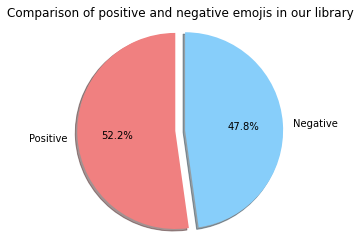

In [6]:
%matplotlib inline
labels = 'Positive', 'Negative'
sizes = [len(positiveEmojis), len(negativeEmojis)]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
colors = ['lightcoral', 'lightskyblue']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Comparison of positive and negative emojis in our library')
plt.show()

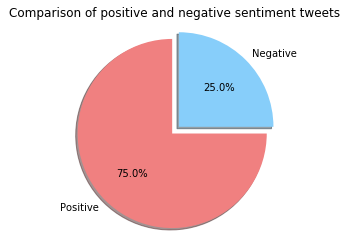

In [7]:
labels = 'Positive', 'Negative'
# go through labeledTweetMatrix and tally positive sentiment, neg just do len(total) - pos
count = 0
negativeCount = 0
for tweet in labeledTweetMatrix:
    if tweet[1] == 1:
        count += 1
    if tweet[1] == 0:
        negativeCount += 1
sizes = [count, negativeCount]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
colors = ['lightcoral', 'lightskyblue']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Comparison of positive and negative sentiment tweets')
plt.show()

## Preprocessing Data

In [7]:
def tokenize(tweet):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens
def removeStopWords(tweet_tokenz):
    stopwords_english = stopwords.words('english')
    stopwords_english.extend(['rt', 'fav', "'"])
    tweets_clean = []
    for word in tweet_tokenz:
        if (word not in stopwords_english and word not in string.punctuation):
            tweets_clean.append(word)
    return tweets_clean
def stemmingTweet(tweet):
    stemmer = PorterStemmer()
    tweets_stem = []
    for word in tweet:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
    return tweets_stem
def preprocess(tweet):
    tweet.lower()
    p.set_options(p.OPT.NUMBER, p.OPT.SMILEY)
    tweet = p.clean(tweet)
    return stemmingTweet(removeStopWords(tokenize(tweet)))

In [8]:
# sample of preprocessing
tweet = tweets_x[0]
print(tweet)
newtweet = preprocess(tweet)
print(newtweet)

Dude is like 5’8 140 pounds his dick was long and strong(always the little dudes carrying the 🍆) 🤪🙃
['dude', 'like', '’', '8', 'pound', 'dick', 'long', 'strong', 'alway', 'littl', 'dude', 'carri', '🍆', '🤪', '🙃']


In [9]:
# preprocess entire matrix
for i in range(len(tweets_x)):
    processedTweet = preprocess(tweets_x[i])
    tweets_x[i] = processedTweet
for i in range(5):
    print(tweets_x[i])

['dude', 'like', '’', '8', 'pound', 'dick', 'long', 'strong', 'alway', 'littl', 'dude', 'carri', '🍆', '🤪', '🙃']
['cant', 'breatiuhw', '💀', '💀', '💀']
['scare', 'bird', '🤧']
['’', '😂', '😂', '😂']
['heart', 'full', 'rn', '💖', '💖']


## Splitting Data into Training and Test Set

In [10]:
# splitting train/test up 70/30
div = round(len(tweets_x)*.7)
train_x = tweets_x[:div]
test_x = tweets_x[div:]
train_y = tweets_y[:div]
test_y = tweets_y[div:]
assert(len(tweets_x) == len(train_x)+len(test_y))
assert(len(tweets_x) == len(train_y)+len(test_y))
# the training and testing sets should be numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

## Frequency Dictionary

In [11]:
# now we will build a dictionary of word frequencies
# train_x and train_y is what we will build our word frequency dictionary from
# we will need to make our y into a list
def word_freqs(trainx, trainy):
    train_y_list = np.squeeze(trainy).tolist()
    frequencyDict = {}
    for y, tweetx in zip(train_y_list, trainx):
        for word in tweetx:
            labeledTweet = (word, y)
            # if word is in dict, add 1 to count, otherwise add to dict         
            if labeledTweet in frequencyDict:
                frequencyDict[labeledTweet]+=1
            else:
                frequencyDict[labeledTweet]=1
    return frequencyDict

In [12]:
# build entire frequency dictionary
freqDict = word_freqs(train_x, train_y)
print(len(freqDict))

6762


In [13]:
# sample
stop = 0
for (key, value) in freqDict:
    if stop == 20:
        break
    else:
        print(key, value, freqDict[key, value])
        stop += 1

dude 1 18
like 1 178
’ 1 712
8 1 1
pound 1 3
dick 1 8
long 1 11
strong 1 7
alway 1 45
littl 1 19
carri 1 7
🍆 1 3
🤪 1 36
🙃 1 5
cant 0 2
breatiuhw 0 1
💀 0 71
scare 0 5
bird 0 3
🤧 0 26


## Analysis of Frequency Dictionary

In [14]:
# Analyze how many times our emojis appear in our frequency dictionary
keys = positiveEmojis + negativeEmojis
data = []
for emoji in keys:
    positive = 0
    negative = 0
    if (emoji, 1) in freqDict:
        positive = freqDict[(emoji, 1)]
    if (emoji, 0) in freqDict:
        negative = freqDict[(emoji, 0)]
    data.append([emoji, positive, negative])
print(data)

[['😋', 21, 0], ['💛', 56, 0], ['😉', 89, 0], ['✌️', 0, 0], ['💕', 212, 0], ['👍', 46, 0], ['😎', 58, 0], ['😜', 31, 0], ['😝', 24, 0], ['😛', 20, 0], ['💖', 127, 0], ['😼', 4, 0], ['😏', 30, 0], ['😺', 0, 0], ['😃', 14, 0], ['😸', 5, 0], ['😄', 24, 0], ['🙂', 15, 0], ['🤣', 198, 0], ['💞', 67, 0], ['😌', 26, 0], ['🙌', 150, 0], ['💜', 104, 0], ['🙏', 242, 0], ['👌', 72, 0], ['🤓', 3, 0], ['🤑', 11, 0], ['👄', 6, 0], ['😆', 64, 0], ['😙', 8, 0], ['😘', 96, 0], ['😚', 14, 0], ['😽', 4, 0], ['😗', 9, 0], ['💋', 47, 0], ['😹', 5, 0], ['😂', 1679, 0], ['😇', 22, 0], ['🤗', 86, 0], ['💗', 112, 0], ['💓', 48, 0], ['😻', 28, 0], ['😍', 475, 0], ['❤️', 0, 0], ['🤝', 2, 0], ['😀', 32, 0], ['😁', 54, 0], ['💚', 59, 0], ['💝', 12, 0], ['🤤', 45, 0], ['💘', 36, 0], ['🤞', 23, 0], ['🤠', 15, 0], ['👏', 170, 0], ['😊', 117, 0], ['💙', 90, 0], ['🖤', 47, 0], ['💯', 138, 0], ['🤪', 36, 0], ['🤐', 1, 7], ['😟', 1, 5], ['😩', 89, 126], ['🙃', 5, 48], ['😒', 4, 25], ['😤', 5, 30], ['😫', 12, 18], ['👎', 0, 10], ['🤔', 12, 95], ['😅', 9, 34], ['😓', 0, 3], ['😭', 292, 426]

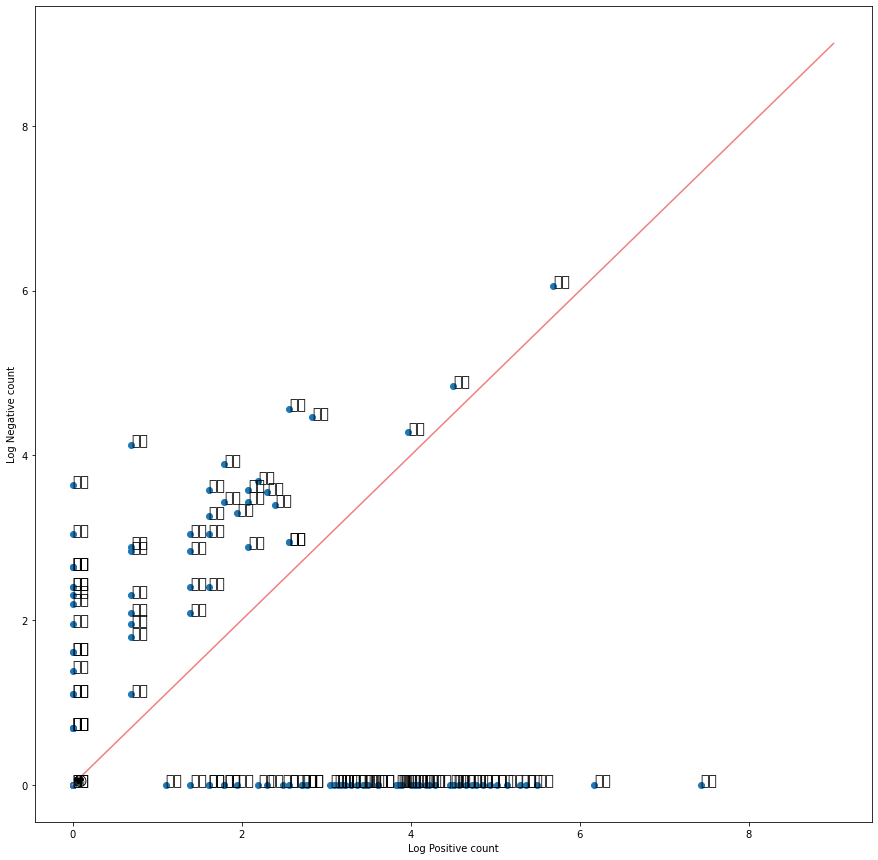

In [15]:
%matplotlib inline
from matplotlib.font_manager import FontProperties
fig, ax = plt.subplots(figsize = (15, 15))
# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  
# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 
# Plot a dot for each pair of words
ax.scatter(x, y)  
# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")
prop = FontProperties(fname=r"C:\Users\akarafas\Downloads\NotoColorEmoji-unhinted\NotoColorEmoji.ttf")
plt.rcParams['font.family'] = prop.get_family()
# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=14)
ax.plot([0, 9], [0, 9], color = 'lightcoral') # Plot the red line that divides the 2 areas.
plt.show()

# Logistic Regression

## Define sigmoid and gradient_descent

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Text(0.5, 1.0, 'Sigmoid')

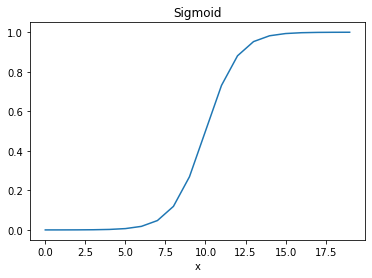

In [18]:
# Sigmoid plot
x = np.arange(-10,10,1)
plt.plot(sigmoid(x))
plt.xlabel('x')
plt.title('Sigmoid')

In [19]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = x.shape[0]
    yt = np.transpose(1-y)
    ytnormal = np.transpose(y)
    for i in range(0, num_iters):
        z = np.dot(x,theta)
        h = sigmoid(z)
        # calculate the loss function
        J = -1./m * (np.dot(ytnormal, np.log(h)) + np.dot(yt,np.log(1-h)))   
        # update the weights theta
        theta = theta - (alpha/m) * np.dot(np.transpose(x),(h-y))
    J = float(J[0])
    thetaArr = [round(theta[0][0], 8), round(theta[1][0], 8), round(theta[2][0], 8)]
    return J, thetaArr

In [20]:
# Gradient Descent Check
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)
# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(tmp_J)
print(tmp_theta)

0.6709497038162118
[4.1e-07, 0.00035658, 7.309e-05]


## Feature Extraction

In [21]:
def extract_features(tweet, freqs):
    word_l = (tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    #bias term is set to 1
    x[0,0] = 1 
    # loop through each word in the list of words
    for word in word_l:
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0), 0)
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)
    assert(x.shape == (1, 3))
    return x

In [22]:
# test on training data
tmp1 = extract_features(train_x[0], freqDict)
print(tmp1)
# test on words not in freq dict
tmp2 = extract_features('comp562isfunhello comp562projectisabtemojis emojisdatasetfromkaggle', freqDict)
print(tmp2)

[[1.000e+00 1.071e+03 5.840e+02]]
[[  1. 325.  78.]]


## Train the model

In [23]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqDict)
# training labels corresponding to X
Y = train_y
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(J)
print(theta)

0.5265168040476461
[5.9e-07, 0.00059515, 0.00012795]


## Test Logistic Regression

In [24]:
def predict_tweet(tweet, freqs, theta):    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))    
    return y_pred

In [26]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print(tweet)
    print(predict_tweet(tweet, freqDict, theta))

I am happy
[0.50328458]
I am bad
[0.50321238]
this movie should have been great.
[0.53163458]
great
[0.50307182]
great great
[0.50614326]
great great great
[0.50921424]
great great great great
[0.51228452]


In [52]:
bad = 'I hate this evil homework 💀💀💀💀💀💀'
my_tweet = 'I am learning 😂😂😂😂😂😂😂😂😂😂😂😂'
print(predict_tweet(bad, freqDict, theta))
print(predict_tweet(my_tweet, freqDict, theta))

[0.57713489]
[0.99999401]


In [53]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    y_hat = []
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred > 0.52:
            y_hat.append(1)
        else:
            y_hat.append(0)
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    return accuracy

In [55]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqDict, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.7685


## Error Analysis 

In [56]:
# Some error analysis
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqDict, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE PROCESSED TWEET IS:',(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join((x)).encode('ascii', 'ignore')))

, 'keep', 'get', 'richer']
0	0.65511607	b'yet  save everi penni see  rich keep get richer'
THE PROCESSED TWEET IS: ['’', 'laugh', 'like', 'minut', 'straight', 'lmfao', '😭', '😭']
0	0.74568963	b' laugh like minut straight lmfao  '
THE PROCESSED TWEET IS: ['serious', '’', 'never', 'even', 'interest', '🤔']
0	0.63160553	b'serious  never even interest '
THE PROCESSED TWEET IS: ['someon', 'syria', 'contact', 'let', 'know', '’', 'fw', 'trump', '😭', '😭', '😭']
0	0.77857415	b'someon syria contact let know  fw trump   '
THE PROCESSED TWEET IS: ['girl', 'insecur', 'cheat', '🤔', "i'm", 'like', '🙅', '🏾', '\u200d', '♂', '️', 'none', 'hoe', 'shit', 'friendli', 'speak', 'share', '…']
0	0.76309752	b"girl insecur cheat  i'm like      none hoe shit friendli speak share "
THE PROCESSED TWEET IS: ['alway', 'funni', '😭']
0	0.56821006	b'alway funni '
THE PROCESSED TWEET IS: ['peopl', 'strang', 'stranger', '🙃']
0	0.51154686	b'peopl strang stranger '
THE PROCESSED TWEET IS: ['uhmmm', 'okay', '😶', '👀']
0	0.505719

In [57]:
my_tweet = 'i hate this evil girl she is the worst'
print((my_tweet))
y_hat = predict_tweet(my_tweet, freqDict, theta)
print(y_hat)
if y_hat > 0.55:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

i hate this evil girl she is the worst
[0.52031034]
Negative sentiment


# Naive Bayes

## Setting up the classifier

In [16]:
labels = 'Positive', 'Negative'
# go through labeledTweetMatrix and tally positive and negative sentiment
count = 0
negativeCount = 0
for tweet in labeledTweetMatrix:
    if tweet[1] == 1:
        count += 1
    if tweet[1] == 0:
        negativeCount += 1
sizes = [count, negativeCount]

## Training the Classifier

In [17]:
# get number of unique words by creating a set
uniqueWords = set([pair[0] for pair in freqDict.keys()])
numPositive = 0
numNegative = 0
uniquePositive = 0
uniqueNegative = 0

#move through frequency dictionary and count total/unique positive and negatives
for pair in freqDict.keys():
    if pair[1] > 0:
        numPositive += freqDict[pair]
        uniquePositive += 1
    else:
        numNegative += freqDict[pair]
        uniqueNegative += 1

#get total numbers of neg/positive in training data
totalTraining = len(train_y)
trainPositive = 0
trainNegative = 0
for item in train_y:
    if item > 0:
        trainPositive += 1
    else:
        trainNegative += 1    

#calculate the probability of positive/negative tweets in training data        
probPositive = trainPositive/totalTraining
probNegative = 1 - probPositive
#calculate our prior probability, take log of it
logPrior = np.log(probPositive) - np.log(probNegative)

#calculate log likelihoods for every unique word
logWords = {}
for word in uniqueWords:
    #first look at positive instances of the word
    pair = (word, 1)
    n = 0
    if (pair in freqDict):
        n = freqDict[pair]
    logPos = (n + 1.)/(numPositive + len(uniqueWords))
    #then look at negative instances of the word
    pair = (word, 0)
    n = 0
    if (pair in freqDict):
        n = freqDict[pair]
    logNeg = (n + 1.)/(numNegative + len(uniqueWords))
    #can put log likelihood in our dictionary, associate it with the word
    logWords[word] = np.log(logPos/logNeg)

# Predicting Tweet Sentiment with Classifier

In [58]:
#function for doing naive bayes on a tweet
#uses formula prob = logprior + sum(log-likelihoods of each word in tweet)
maxArr = np.array([0, 0, 0, 0, 0])
maxArrTweets = [None]*5
minArr = np.array([1, 1, 1, 1, 1])
minArrTweets = [None]*5
def naiveBayes(tweet):
    prob = 0
    for word in tweet:
        if word in logWords:
            prob += logWords[word]
    prob += logPrior
    for i in range(len(maxArr)):
        if (prob > maxArr[i]):
            maxArr[i] = prob
            maxArrTweets[i] = tweet
            break
        if (prob < minArr[i]):
            minArr[i] = prob
            minArrTweets[i] = tweet
            break
    return prob

#example of testing a positive and negative tweet (including emojis)
newTweet = 'I am happy and glad and smiling and I love my life ❤️'
prob = naiveBayes(newTweet)
print('Output for positive example: ', prob)
newTweet1 = 'I am sad and I hate my life and everything sucks 🤢'
prob = naiveBayes(newTweet1)
print('Output for negative example: ', prob)

Output for positive example:  22.081497756192675
Output for negative example:  12.032963787976106


In [59]:
#running naive bayes on every prediction in the test set
predictions = []
def testAccuracyNaive(test_x, test_y):
    for tweet in test_x:
        prob = naiveBayes(tweet)
        if (prob > 0):
            predictions.append(1)
        else:
            predictions.append(0)
    #compute error as the average of all the y's (actual) and yhat's (predictions)        
    error = np.mean(np.absolute(test_y - predictions))
    return 1-error
print('Accuracy: ', testAccuracyNaive(test_x, test_y))     
print()
print('Most positive sentiments: ')
print(maxArr)
print('Most positive tweets: ')
for i in range(len(maxArrTweets)):
    print(maxArrTweets[i])
print()
print('Most negative sentiments: ')    
print(minArr)
print('Most negative tweets: ')
for i in range(len(minArrTweets)):
    print(minArrTweets[i])    

Accuracy:  0.9400516795865633

Most positive sentiments: 
[86 56 51 44 41]
Most positive tweets: 
['ill', 'happiest', 'girl', 'aliv', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️']
['salah', 'father', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '❤', '️', '😘', '😘', '❤', '️']
['happi', 'ever', '❤', '️', '🕺', '❤', '️', '🕺', '❤', '️', '🕺', '❤', '️', '🕺', '❤', '️', '🕺', '❤', '️', '🕺', '❤', '️', '🕺', '❤', '️']
['😂', '😂', '😂', 'putin', '’', 'go', 'protect', 'traitor', 'vote', '😂', '😂', '😂']
['😂', '😂', '😂', 'noooh', 'child', 'abus', 'could', 'mummi', 'let', 'daddi', 'child', 'like', '😂', '😂', '😂']

Most negative sentiments: 
[-23 -22 -17 -16 -15]
Most negative tweets: 
['🐥', 'la_kpop', 'revolut', 'est', 'total', '19', '(8', 'kst', 'g', 'k', '🚨', '🚨', 'bt', 'k', '🚨', '🚨', '🚨', '사이렌', '..', '등장', '...', '😢']
['saw', '’', 'sayin', 'like', '🤔', 'geniu', 'got', 